<a href="https://colab.research.google.com/github/sujeet311/Quantuma_Boosting/blob/main/cross_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, roc_curve,accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score,learning_curve

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/code thesis/val.csv') #Load the CSV file
df= df.drop('Unnamed: 0',axis=1)
df.shape

(388754, 22)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['Diabetes_binary'],axis=1)
y = df['Diabetes_binary']

y = (2* y) -1

In [ ]:
X.sample(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
133160,1.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,5.0,1.0,2.0,0.0,0.0,9.0,4.0,2.0
109050,1.0,1.0,1.0,33.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,0.0,3.0,0.0,1.0,10.0,4.0,4.0
308079,0.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,3.0,3.0,0.0,0.0,8.0,6.0,8.0
177962,1.0,1.0,1.0,35.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,2.0,1.0,1.0,13.0,5.0,7.0
308391,1.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,6.0,8.0


In [ ]:
y.sample(5)

361738   -1.0
153548    1.0
382406   -1.0
224574   -1.0
187710    1.0
Name: Diabetes_binary, dtype: float64

In [ ]:
# scaling data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)


In [ ]:
# Cross val metric
def cross_val_metrics(model,cv) :
    scores = ['accuracy', 'precision', 'recall','f1']
    print("k - fold=",cv)
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = cv, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))


In [ ]:
import joblib
QBC= joblib.load('/content/drive/MyDrive/FINALCODE/Model/QBC.pkl' )  # qboost
ada = joblib.load('/content/drive/MyDrive/QC Code/model/ada.pkl' )   #  Adaboost
wt_avg=joblib.load('/content/drive/MyDrive/QC Code/model/WT_AVG.pkl' )  #weighted average
xgb=joblib.load('/content/drive/MyDrive/QC Code/model/xgb.pkl' )  #weighted average
wt=joblib.load('/content/drive/MyDrive/QC Code/model/wt_avg.pkl' )  #weighted average
qene=joblib.load('/content/drive/MyDrive/FINALCODE/Model/Qensembl.pkl' )


In [ ]:
# Cross val majority
cv = [5,10]
for c in cv:
  cross_ada= cross_val_metrics(ada,c)

k - fold= 5
[accuracy] : 0.94911 (+/- 0.00162)
[precision] : 0.91477 (+/- 0.00271)
[recall] : 0.99036 (+/- 0.00027)
[f1] : 0.95143 (+/- 0.00160)
k - fold= 10


In [ ]:
cv = [10]
for c in cv:
  cross_ada= cross_val_metrics(ada,c)

k - fold= 10
[accuracy] : 0.95698 (+/- 0.00221)
[precision] : 0.92440 (+/- 0.00402)
[recall] : 0.99429 (+/- 0.00081)
[f1] : 0.95860 (+/- 0.00215)


In [ ]:
# Cross val majority
cv = [5,10]
for c in cv:
  cross_wt_avg = cross_val_metrics(wt_avg,c)

k - fold= 5
[accuracy] : 0.86163 (+/- 0.00484)
[precision] : 0.82443 (+/- 0.00454)
[recall] : 0.91892 (+/- 0.00200)
[f1] : 0.86861 (+/- 0.00332)
k - fold= 10
[accuracy] : 0.87396 (+/- 0.00373)
[precision] : 0.83306 (+/- 0.00475)
[recall] : 0.93276 (+/- 0.00420)
[f1] : 0.87928 (+/- 0.00279)


In [ ]:
# Cross val majority
cv = [5,10]
for c in cv:
  cross_xgb = cross_val_metrics(xgb,c)

k - fold= 5
[accuracy] : 0.77708 (+/- 0.00709)
[precision] : 0.74849 (+/- 0.00981)
[recall] : 0.83491 (+/- 0.00171)
[f1] : 0.78930 (+/- 0.00522)
k - fold= 10
[accuracy] : 0.77756 (+/- 0.00791)
[precision] : 0.74911 (+/- 0.01112)
[recall] : 0.83507 (+/- 0.00254)
[f1] : 0.78970 (+/- 0.00572)


In [ ]:
params= {'verbose':False}
cv = [5,10]
for c in cv:
  cross_cgb = cross_val_metric(cgb,params,c)



k - fold= 5
[accuracy] : 0.75728 (+/- 0.00690)
[precision] : 0.73365 (+/- 0.00997)
[recall] : 0.80822 (+/- 0.00279)
[f1] : 0.76908 (+/- 0.00477)
k - fold= 10
[accuracy] : 0.75871 (+/- 0.00870)
[precision] : 0.73498 (+/- 0.01183)
[recall] : 0.80968 (+/- 0.00330)
[f1] : 0.77047 (+/- 0.00632)


In [ ]:
# Cross val majority
# Cross val majority
cv = [5,10]
for c in cv:
  cross_qbc = cross_val_metrics(QBC,c)

k - fold= 5
[accuracy] : 0.73555 (+/- 0.00733)
[precision] : 0.72386 (+/- 0.01124)
[recall] : 0.76215 (+/- 0.00249)
[f1] : 0.74245 (+/- 0.00475)
k - fold= 10
[accuracy] : 0.73556 (+/- 0.00885)
[precision] : 0.72399 (+/- 0.01286)
[recall] : 0.76201 (+/- 0.00299)
[f1] : 0.74243 (+/- 0.00608)


In [ ]:
# Cross val majority
cv = [5,10]
for c in cv:
  cross_qene = cross_val_metrics(qene,c)

k - fold= 5
[accuracy] : 0.90418 (+/- 0.00425)
[precision] : 0.86424 (+/- 0.00605)
[recall] : 0.95907 (+/- 0.00116)
[f1] : 0.90918 (+/- 0.00374)
k - fold= 10
[accuracy] : 0.91592 (+/- 0.00458)
[precision] : 0.87709 (+/- 0.00710)
[recall] : 0.96748 (+/- 0.00148)
[f1] : 0.92005 (+/- 0.00404)


In [ ]:
# Learning curve
def plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(.01, 1.0, 5)):

    plt.figure(figsize=(8,5 ))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, n_jobs = n_jobs, train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color = "k",
             label = "Training score")
    plt.plot(train_sizes, test_scores_mean, 'x-', color = "c",
             label = "Cross-validation score")
    plt.fill_between(train_sizes, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, color='#DDDDDD')

    plt.fill_between(train_sizes, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, color='#DDDDDD')

    plt.legend(loc = "best")
    return plt

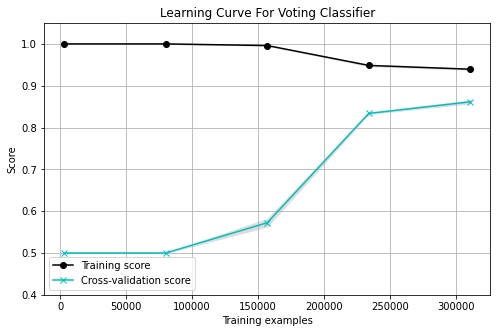

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(wt_avg, 'Learning Curve For Voting Classifier', X, y, (0.4,1.05), 5)
plt.savefig('7')
plt.show()

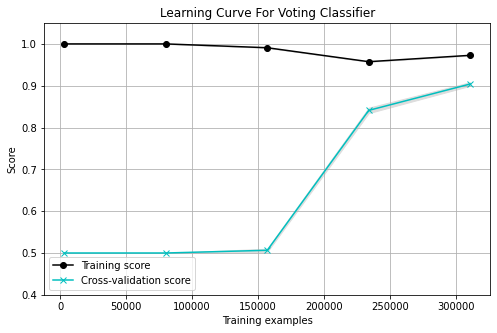

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(wt, 'Learning Curve For Voting Classifier', X, y, (0.4,1.05), 5)
plt.savefig('7')
plt.show()

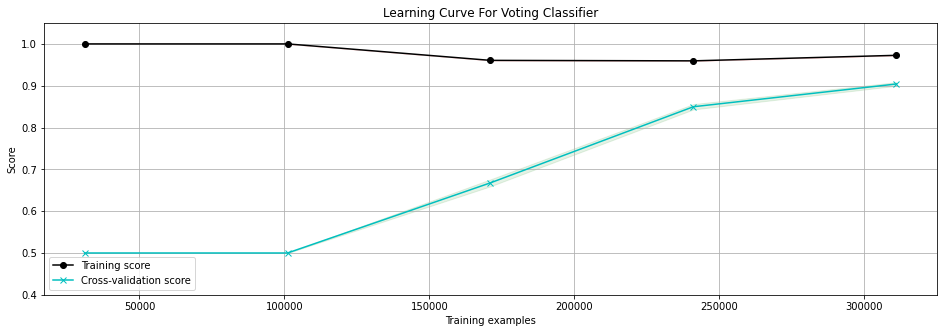

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(qene, 'Learning Curve For Voting Classifier', X, y, (0.4,1.05), 5)
plt.savefig('7')
plt.show()

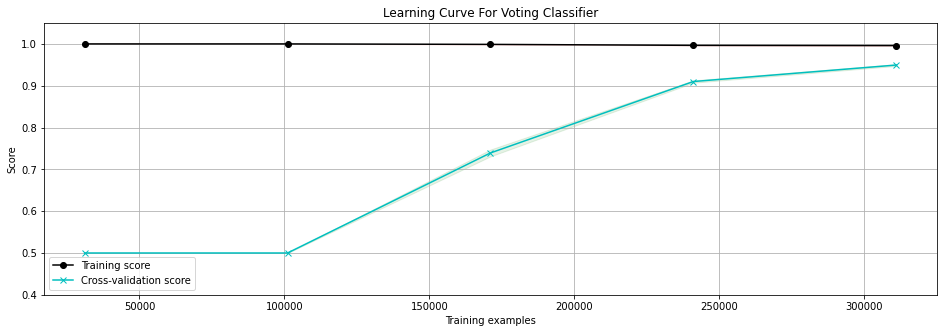

In [ ]:
#Learning curve Log with best hyperpara
plot_learning_curve(ada, 'Learning Curve For Voting Classifier', X, y, (0.4,1.05), 5)
plt.savefig('7')
plt.show()